# 들어가며

**학습 목표**

- 정칙화(Regularization)의 개념을 이해하고 정규화(Normalization)와 구분합니다.
- L1 regularization과 L2 regularization의 차이를 설명합니다.
- 실습을 통하여 Lp norm, Dropout, Batch Normalization에 대해 학습합니다.

**목차**

- Regularization과 Normalization
- L1 Regularization
- L2 Regularization
- Extra : Lp norm
- Dropout
- Batch Normalization

# Regularization과 Normalization

## (1) Regularization? Normalization?

**Regularization**: 정칙화라고 불리며, 오버피팅을 해결하기 위한 방법 중 하나이다. L1,L2 Regularization, Dropout, Batch normalization 등이 있다. overfitting을 방지하기 위해 한다.

**Normalization**: 정규화라고 불리며, 데이터의 형태를 더 의미있게, 트레이닝에 적합하게 전처리하는 과정이다. 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0 ~ 1 사이 값으로 분포를 조정하는 것들이 해당된다. 이들은 모든 피쳐의 범위 분포를 동일하게 해 모델이 풀어야 하는 문제를 더 간단하게 바꿔주는 전처리 과정이다.

> ❔ What is z-score?  [z-score](https://www.statisticshowto.com/probability-and-statistics/z-score/)   
> ❕ The Z-score, or standard score, is the number of standard deviations a given data point lies above or below mean. (z = (x – μ) / σ)





In [2]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Iris data 중 virginica라는 종의 petal length(꽃잎 길이)를 X, sepal length(꽃받침의 길이)를 Y로 두고 print 해보자

In [3]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print(X)
print(Y)

[6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
[6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


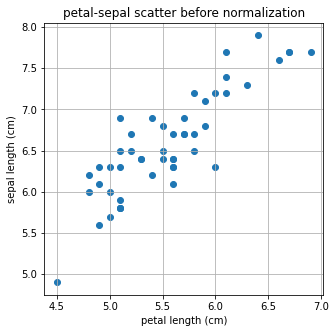

In [4]:
# 시각화-산점도
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

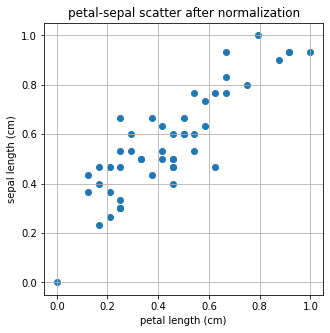

In [7]:
# normalization

from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

Linear Regression 모델을 사용해서 모델링해보자.`Lasso`와 `Ridge`모델도 함꼐 있으므로 이들의 차이점을 먼저 직관적으로 이해해보자.

In [8]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


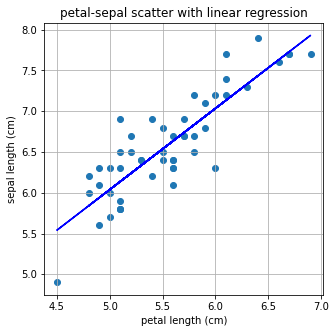

In [9]:
# linear regression으로 구한 기울기, 절편으로 일차함수 그리기
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

이번에는 L1, L2 Regularization으로 Regression을 해보겠습니다. 이는 Lasso, Ridge라고 부른다

기울기 : 0.00, 절편 : 6.59


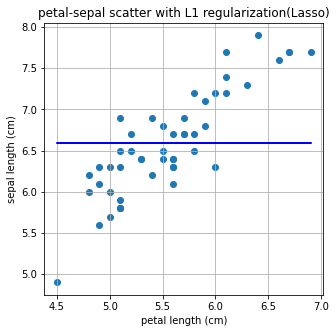

In [58]:
# Lasoo
# L1 regularization은 Lasso로 import 합니다.
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b=L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L1 regularization(Lasso)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.93, 절편 : 1.41


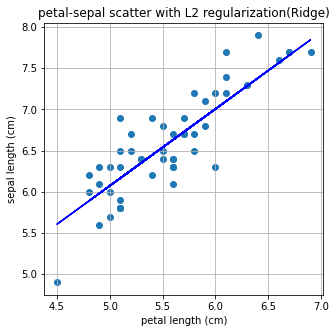

In [11]:
# Ridge
#L2 regularization은 Ridge로 import 합니다. 
from sklearn.linear_model import Ridge

L2 = Ridge()
L2.fit(X.reshape(-1,1), Y)
a, b = L2.coef_, L2.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L2.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with L2 regularization(Ridge)') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

Linear Regression은 L2 Norm과 관련이 있다. 따라서 L2 Regularization을 적용한 Ridge 방법으로는 linear regression과 큰 차이가 없는 결과가 나온다.

이제, 왜 **L1 Regularization을 쓰는 Lasso**에서는 답이 나오지 않는지 알아보자!


# L1 Regularization

## (1) L1 regularization (Lasso)의 정의

L1 regularization은 아래와 같은 식으로 정의된다.

# 1111111

In [12]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


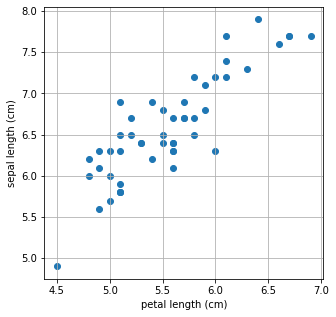

In [13]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

X = np.array(X)
Y = np.array(Y)

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.00, 절편 : 6.59


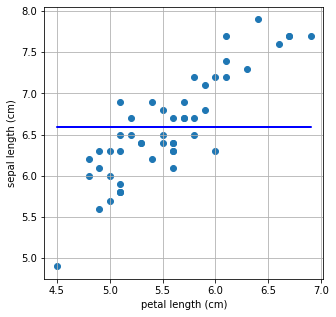

In [14]:
from sklearn.linear_model import Lasso

L1 = Lasso()
L1.fit(X.reshape(-1,1), Y)
a, b = L1.coef_, L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,L1.predict(X.reshape(-1,1)),'-b')
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

## (2) 이전 스텝에서 왜 L1 Regularization 만 답이 나오지 않았을까?

# 222222222222

## (3) 컬럼 수가 많은 데이터에서의 L1 regularization 비교

Iris data는 특성이 4개로 컬럼 수가 적으니 wine dataset을 이용해보자. 총 13개의 값을 가진다.

In [15]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])

In [17]:
#예시 
wine_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [18]:
#예시
target_df.head(5)

,Y
0,0
1,0
2,0
3,0
4,0


먼저 linear regression으로 문제를 풀고, 그 계수와 MAE, MSE, RMSE를 출력해보자.

In [19]:
# linear regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 데이터를 준비하고
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size=0.3, random_state=101)

# 모델을 훈련시킵니다.
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트를 해볼까요?
model.predict(X_test)
pred = model.predict(X_test)

# 테스트 결과는 이렇습니다!
print("result of linear regression")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient linear regression")
print(model.coef_)

result of linear regression
Mean Absolute Error: 0.25128973939722626
Mean Squared Error: 0.1062458740952556
Mean Root Squared Error: 0.32595379134971814


 coefficient linear regression
[[-8.09017190e-02  4.34817880e-02 -1.18857931e-01  3.65705449e-02
  -4.68014203e-04  1.41423581e-01 -4.54107854e-01 -5.13172664e-01
   9.69318443e-02  5.34311136e-02 -1.27626604e-01 -2.91381844e-01
  -5.72238959e-04]]


In [20]:
# L1 legularization으로 문제를 풀어보자.
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 모델을 준비하고 훈련시킵니다.
L1 = Lasso(alpha=0.05)
L1.fit(X_train, y_train)

# 테스트를 해봅시다.
pred = L1.predict(X_test)

# 모델 성능은 얼마나 좋을까요?
print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24233731936122138
Mean Squared Error: 0.0955956894578189
Mean Root Squared Error: 0.3091855259513597


 coefficient of Lasso
[-0.          0.01373795 -0.          0.03065716  0.00154719 -0.
 -0.34143614 -0.          0.          0.06755943 -0.         -0.14558153
 -0.00089635]


**결과분석**

coefficient부분을 보면 Linear regression과 lasso 차이가 더 두드러짐을 알 수 있다. linear regression에서는 모든 칼럼의 가중치를 탐색해 구하는 반면, L1 regularization에서는 총 13개 중 7개를 제외한 값들이 모두 0임을 알 수 있다.

Error부분에서는 큰 차이가 없었지만, 어떤 컬럼이 결과에 영향을 크게 미치는지 확실히 확인할 수 있다. 이 경우 다른 문제에서도 error 차이가 크지 않다면, ㅊ차원 축소와 비슷한 개념으로 변수값을 7개만 남겨도 충분히 결과를 예측할 것이다.

**다만 linear regression과 L1, L2 Regularization의 차이 중 하나는 $\alpha$라는 하이퍼파라미터가 하나 더 들어간다는 것이고, 그 값에 따라 error에 영향을 미친다는 것이다.**



# L2  Regularization

## (1) L2 Regularization(Ridge) 의 정의

# 3333333333333333333

## (2) L1 vs L2 Regularization


# 44444444444


In [22]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
target_df = pd.DataFrame(data=wine.target, columns=['Y'])
X_train, X_test, y_train, y_test = train_test_split(wine_df, target_df, test_size= 0.3, random_state=101)
print('=3')

=3


In [23]:
# L1 regularization으로 iter=5로 두고 풀어보기
from sklearn.linear_model import Lasso

L1 = Lasso(alpha=0.05, max_iter=5)
L1.fit(X_train, y_train)
pred = L1.predict(X_test)

print("result of Lasso")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Lasso")
print(L1.coef_)

result of Lasso
Mean Absolute Error: 0.24845768841769436
Mean Squared Error: 0.10262989110341268
Mean Root Squared Error: 0.32035900346862844


 coefficient of Lasso
[-0.          0.         -0.          0.03295564  0.00109495  0.
 -0.4027847   0.          0.          0.06023131 -0.         -0.12001119
 -0.00078971]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:645: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.924e+00, tolerance: 7.480e-03
  model = cd_fast.enet_coordinate_descent(


In [24]:
# L2 동일한 제약 조건으로.
from sklearn.linear_model import Ridge

L2 = Ridge(alpha=0.05,max_iter=5)
L2.fit(X_train, y_train)
pred = L2.predict(X_test)

print("result of Ridge")
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Root Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

print("\n\n coefficient of Ridge")
print(L2.coef_)

result of Ridge
Mean Absolute Error: 0.251146695993643
Mean Squared Error: 0.10568076460795564
Mean Root Squared Error: 0.3250857803841251


 coefficient of Ridge
[[-8.12456257e-02  4.35541496e-02 -1.21661565e-01  3.65979773e-02
  -3.94014013e-04  1.39168707e-01 -4.50691113e-01 -4.87216747e-01
   9.54111059e-02  5.37077039e-02 -1.28602933e-01 -2.89832790e-01
  -5.73136185e-04]]


L1 Regularization은 가중치가 적은 벡터에 해당하는 계수를 0으로 보내면서 **차원 축소와 비슷한 역할**을 하는 것이 특징이며, L2 Regularization은 0이 아닌 0에 가깝게 보내지만 제곱 텀이 있기 때문에 L1 보다 수렴속도가 빠르다는 장점이 있다.

데이터에 따라 적절한 Regularization 방법을 활용하는 것이 좋다.

# Extra: Lp norm

## (1) vector norm

# 55555555555

In [28]:
x=np.array([1,10,1,1,1])
p=2
norm_x=np.linalg.norm(x, ord=p)
making_norm = (sum(x**p))**(1/p)
print("result of numpy package norm function : %0.5f "%norm_x) 
print("result of making norm : %0.5f "%making_norm)

result of numpy package norm function : 10.19804 
result of making norm : 10.19804 


p가 우리가 생각하는 자연수가 아닌 경우 어떻게 될까?

p = ∞ Infinity norm의 경우는 가장 큰 숫자를 출력한다.

# 66666666

In [29]:
norm_x=np.linalg.norm(x, ord=np.inf)
print("result of infinite norm : %0.5f "%norm_x)

result of infinite norm : 10.00000 


## (2) matrix norm

# 77777777777

In [30]:
A=np.array([[1,2,3],[1,2,3],[4,6,8]])
inf_norm_A=np.linalg.norm(A, ord=np.inf)
print("result inf norm of A :", inf_norm_A)
one_norm_A=np.linalg.norm(A, ord=1)
print("result one norm of A :", one_norm_A)

result inf norm of A : 18.0
result one norm of A : 14.0


# Dropout

- 논문 제목 : Dropout: A Simple Way to Prevent Neural Networks from Overfitting
- 논문 발표 시점 : 2014년
- 논문 링크 : 논문 주소(https://jmlr.org/papers/v15/srivastava14a.html)
- [참고 영상](https://www.youtube.com/watch?v=czSKnb4nDu8&ab_channel=%EA%B3%A0%EB%A0%A4%EB%8C%80%ED%95%99%EA%B5%90%EC%82%B0%EC%97%85%EA%B2%BD%EC%98%81%EA%B3%B5%ED%95%99%EB%B6%80DSBA%EC%97%B0%EA%B5%AC%EC%8B%A4)

Dropout은 오버피팅을 막는 Regularization layer 중 하나이다. fully connected layer에서 오버피팅이 생기는 경우에 주로 Dropout layer를 추가한다.

## (1) 실습: not overfitting

Fashion MNIST datset으로 학습을 시키자. 드롭아웃 레이어를 확률을 1에 가깝게 주면 어떻게 되는지 살펴보자.

In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [33]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

4431872/4422102 [==============================] - 0s 0us/step


dropout 확률을 0.9로 주었을 때의 결과를 살펴보자.

In [35]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 아래의 실습과 같습니다.
    keras.layers.Dropout(0.9),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.3670 - accuracy: 0.4603
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1633 - accuracy: 0.5303
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.1038 - accuracy: 0.5543
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0815 - accuracy: 0.5630
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0603 - accuracy: 0.5733


dropout이 없을 때 실습을 하면, 5 epoch만 돌려도 높은 정확도를 볼 수 있다.

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    # 이번에는 dropout layer가 없습니다. 
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 2ms/step - loss: 0.4982 - accuracy: 0.8240
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3765 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3370 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3138 - accuracy: 0.8847
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2952 - accuracy: 0.8913


# (2) 실습: overfitting

일부러 overfitting을 시켜보기 위해 train set을 99%로 늘리고 validation set을 줄여보자.

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.01, random_state=101)
X_train = X_train / 255.0
X_valid = X_valid / 255.0

#Dense layer만으로 만들어 낸 classification 모델입니다.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 4ms/step - loss: 2.0525 - accuracy: 0.5124 - val_loss: 1.6445 - val_accuracy: 0.5867
Epoch 2/200
117/117 [==============================] - 0s 2ms/step - loss: 1.4014 - accuracy: 0.6157 - val_loss: 1.1777 - val_accuracy: 0.6717
Epoch 3/200
117/117 [==============================] - 0s 2ms/step - loss: 1.0744 - accuracy: 0.6819 - val_loss: 0.9525 - val_accuracy: 0.7383
Epoch 4/200
117/117 [==============================] - 0s 2ms/step - loss: 0.8927 - accuracy: 0.7204 - val_loss: 0.8173 - val_accuracy: 0.7517
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7859 - accuracy: 0.7377 - val_loss: 0.7317 - val_accuracy: 0.7717
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7204 - accuracy: 0.7495 - val_loss: 0.6817 - val_accuracy: 0.7750
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.7602 - val_loss: 0.6500 - val_accuracy: 0.7867

Epoch 58/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8637 - val_loss: 0.3951 - val_accuracy: 0.8350
Epoch 59/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3878 - accuracy: 0.8641 - val_loss: 0.3931 - val_accuracy: 0.8350
Epoch 60/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8649 - val_loss: 0.3955 - val_accuracy: 0.8417
Epoch 61/200
117/117 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8651 - val_loss: 0.3919 - val_accuracy: 0.8450
Epoch 62/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3827 - accuracy: 0.8659 - val_loss: 0.3939 - val_accuracy: 0.8383
Epoch 63/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3823 - accuracy: 0.8661 - val_loss: 0.3895 - val_accuracy: 0.8400
Epoch 64/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3803 - accuracy: 0.8659 - val_loss: 0.3921 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8827 - val_loss: 0.3548 - val_accuracy: 0.8567
Epoch 116/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.8838 - val_loss: 0.3491 - val_accuracy: 0.8450
Epoch 117/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3311 - accuracy: 0.8829 - val_loss: 0.3541 - val_accuracy: 0.8550
Epoch 118/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3305 - accuracy: 0.8835 - val_loss: 0.3472 - val_accuracy: 0.8500
Epoch 119/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3300 - accuracy: 0.8830 - val_loss: 0.3506 - val_accuracy: 0.8533
Epoch 120/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8839 - val_loss: 0.3499 - val_accuracy: 0.8550
Epoch 121/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3286 - accuracy: 0.8831 - val_loss: 0.3492 - val_ac

117/117 [==============================] - 0s 3ms/step - loss: 0.2975 - accuracy: 0.8943 - val_loss: 0.3323 - val_accuracy: 0.8700
Epoch 172/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2966 - accuracy: 0.8941 - val_loss: 0.3317 - val_accuracy: 0.8700
Epoch 173/200
117/117 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8939 - val_loss: 0.3293 - val_accuracy: 0.8750
Epoch 174/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2952 - accuracy: 0.8954 - val_loss: 0.3304 - val_accuracy: 0.8733
Epoch 175/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2949 - accuracy: 0.8949 - val_loss: 0.3361 - val_accuracy: 0.8617
Epoch 176/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2942 - accuracy: 0.8951 - val_loss: 0.3329 - val_accuracy: 0.8650
Epoch 177/200
117/117 [==============================] - 0s 3ms/step - loss: 0.2943 - accuracy: 0.8951 - val_loss: 0.3286 - val_accuracy: 0.8650

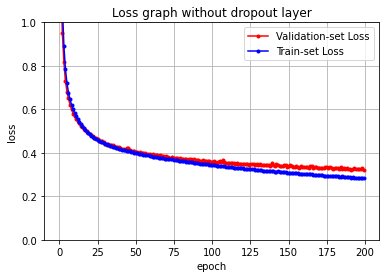

In [39]:
# loss 값을 plot 해보겠습니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.title('Loss graph without dropout layer') 
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

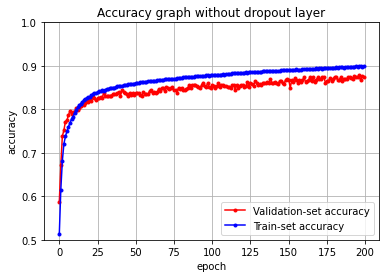

In [40]:
# accuracy 값을 plot 해보겠습니다.
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph without dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

이렇게 오버피팅을 만든 환경에서 나머지 환경은 같게 실험해보자.

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation='relu'),
    # 여기에 dropout layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다. 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/200
117/117 [==============================] - 1s 3ms/step - loss: 2.0632 - accuracy: 0.4626 - val_loss: 1.6692 - val_accuracy: 0.5517
Epoch 2/200
117/117 [==============================] - 0s 3ms/step - loss: 1.4476 - accuracy: 0.5548 - val_loss: 1.2078 - val_accuracy: 0.6617
Epoch 3/200
117/117 [==============================] - 0s 3ms/step - loss: 1.1437 - accuracy: 0.6274 - val_loss: 0.9981 - val_accuracy: 0.7083
Epoch 4/200
117/117 [==============================] - 0s 3ms/step - loss: 0.9806 - accuracy: 0.6718 - val_loss: 0.8681 - val_accuracy: 0.7417
Epoch 5/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8791 - accuracy: 0.6999 - val_loss: 0.7862 - val_accuracy: 0.7517
Epoch 6/200
117/117 [==============================] - 0s 3ms/step - loss: 0.8115 - accuracy: 0.7176 - val_loss: 0.7295 - val_accuracy: 0.7750
Epoch 7/200
117/117 [==============================] - 0s 3ms/step - loss: 0.7652 - accuracy: 0.7285 - val_loss: 0.6905 - val_accuracy: 0.7850

Epoch 58/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4249 - accuracy: 0.8494 - val_loss: 0.4023 - val_accuracy: 0.8350
Epoch 59/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4241 - accuracy: 0.8500 - val_loss: 0.4024 - val_accuracy: 0.8350
Epoch 60/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4207 - accuracy: 0.8520 - val_loss: 0.4014 - val_accuracy: 0.8350
Epoch 61/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4186 - accuracy: 0.8526 - val_loss: 0.4002 - val_accuracy: 0.8383
Epoch 62/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4168 - accuracy: 0.8524 - val_loss: 0.3979 - val_accuracy: 0.8383
Epoch 63/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8527 - val_loss: 0.3963 - val_accuracy: 0.8300
Epoch 64/200
117/117 [==============================] - 0s 3ms/step - loss: 0.4158 - accuracy: 0.8528 - val_loss: 0.3951 - val_accuracy:

Epoch 115/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3617 - accuracy: 0.8716 - val_loss: 0.3463 - val_accuracy: 0.8533
Epoch 116/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8720 - val_loss: 0.3494 - val_accuracy: 0.8517
Epoch 117/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3618 - accuracy: 0.8726 - val_loss: 0.3483 - val_accuracy: 0.8517
Epoch 118/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8719 - val_loss: 0.3448 - val_accuracy: 0.8517
Epoch 119/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3617 - accuracy: 0.8731 - val_loss: 0.3459 - val_accuracy: 0.8517
Epoch 120/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3596 - accuracy: 0.8730 - val_loss: 0.3461 - val_accuracy: 0.8517
Epoch 121/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3566 - accuracy: 0.8734 - val_loss: 0.3427 - val_ac

117/117 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8850 - val_loss: 0.3232 - val_accuracy: 0.8700
Epoch 172/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8830 - val_loss: 0.3184 - val_accuracy: 0.8667
Epoch 173/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3291 - accuracy: 0.8840 - val_loss: 0.3217 - val_accuracy: 0.8683
Epoch 174/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.8849 - val_loss: 0.3242 - val_accuracy: 0.8633
Epoch 175/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3251 - accuracy: 0.8842 - val_loss: 0.3223 - val_accuracy: 0.8667
Epoch 176/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3270 - accuracy: 0.8839 - val_loss: 0.3199 - val_accuracy: 0.8683
Epoch 177/200
117/117 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8838 - val_loss: 0.3196 - val_accuracy: 0.8683

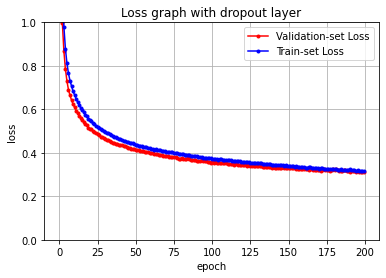

In [42]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

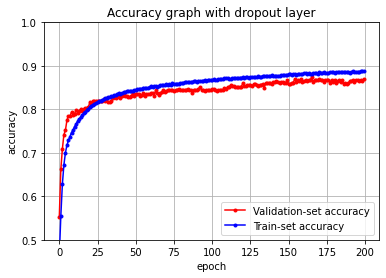

In [43]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accuracy graph with dropout layer') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# Batch Normalization

Batch Normalization은 gradient vanishing, explode 문제를 해결하는 방법이다.

- 논문 제목 : Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift
- 논문 발표 시점 : 2015년
- 논문 링크 : 논문 PDF(https://arxiv.org/pdf/1502.03167.pdf)
- [참고 영상](https://youtu.be/58fuWVu5DVU)

# 8888888888888

## (1) 실습

아무것도 하지 않은 fully connected layer와 Batch Normalization layer를 추가한 두 실험을 비교해보자. **정확도 비교와 속도의 차이**에 초점을 맞추자

In [45]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
print('=3')

=3


In [46]:
# load mnist dataset (10 classes)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

In [48]:
# split dataset and add dense layer

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_images, train_labels, test_size=0.3, random_state=101)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 17ms/step - loss: 1.2663 - accuracy: 0.5994 - val_loss: 0.7627 - val_accuracy: 0.7374
Epoch 2/20
21/21 [==============================] - 0s 7ms/step - loss: 0.6712 - accuracy: 0.7714 - val_loss: 0.6129 - val_accuracy: 0.7924
Epoch 3/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5684 - accuracy: 0.8094 - val_loss: 0.5517 - val_accuracy: 0.8110
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5149 - accuracy: 0.8280 - val_loss: 0.5037 - val_accuracy: 0.8309
Epoch 5/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4820 - accuracy: 0.8384 - val_loss: 0.4830 - val_accuracy: 0.8364
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4569 - accuracy: 0.8461 - val_loss: 0.4648 - val_accuracy: 0.8397
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4399 - accuracy: 0.8494 - val_loss: 0.4495 - val_accuracy: 0.8465
Epoch 8/20
21/21 [=

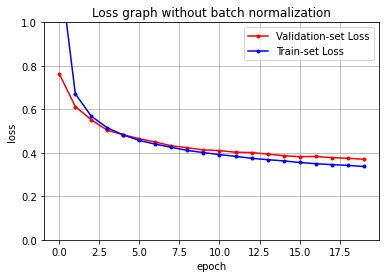

In [49]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

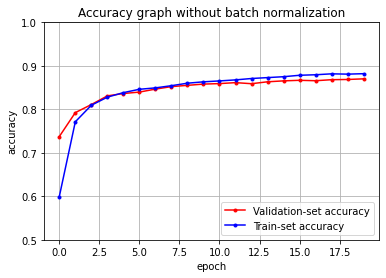

In [50]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1)
plt.title('Accuracy graph without batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [51]:
# batch

In [55]:
#
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    #여기에 batchnormalization layer를 추가해보았습니다. 나머지 layer는 위의 실습과 같습니다.
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history= model.fit(X_train, y_train, epochs=20, batch_size=2048, validation_data=(X_valid, y_valid))

Epoch 1/20
21/21 [==============================] - 1s 18ms/step - loss: 0.9017 - accuracy: 0.6902 - val_loss: 1.0565 - val_accuracy: 0.6830
Epoch 2/20
21/21 [==============================] - 0s 6ms/step - loss: 0.5185 - accuracy: 0.8251 - val_loss: 0.8669 - val_accuracy: 0.7356
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 0.4538 - accuracy: 0.8440 - val_loss: 0.7293 - val_accuracy: 0.7953
Epoch 4/20
21/21 [==============================] - 0s 6ms/step - loss: 0.4143 - accuracy: 0.8579 - val_loss: 0.6455 - val_accuracy: 0.8363
Epoch 5/20
21/21 [==============================] - 0s 6ms/step - loss: 0.3867 - accuracy: 0.8666 - val_loss: 0.6034 - val_accuracy: 0.8389
Epoch 6/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3676 - accuracy: 0.8719 - val_loss: 0.5492 - val_accuracy: 0.8532
Epoch 7/20
21/21 [==============================] - 0s 7ms/step - loss: 0.3476 - accuracy: 0.8800 - val_loss: 0.5166 - val_accuracy: 0.8586
Epoch 8/20
21/21 [=

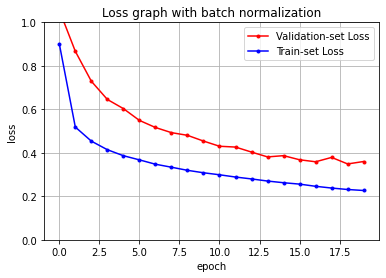

In [56]:
# loss 값을 plot 해보겠습니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.title('Loss graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

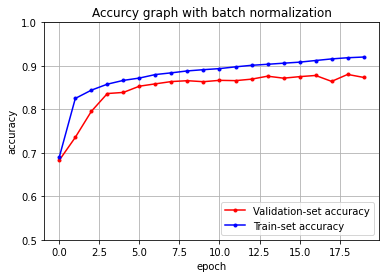

In [57]:
# accuracy 값을 plot 해보겠습니다. 
y_vacc = history.history['val_accuracy']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_vacc, marker='.', c='red', label="Validation-set accuracy")
plt.plot(x_len, y_acc, marker='.', c='blue', label="Train-set accuracy")
plt.legend(loc='lower right')
plt.grid()
plt.ylim(0.5,1) 
plt.title('Accurcy graph with batch normalization') 
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()


기존 fully connected layer도 낮지 않은 결과를 가져오지만, batch normalization을 추가하니 좀 더 빠른 정확도 향상이 있음을 확인할 수 있었다.

또한 loss function의 감소도 더 빨라짐을 확인할 수 있었다.

즉 Batch normalization으로 인해 이미지가 정규화되면서 좀 더 고른 분포를 가지기도 하며, ϵ 부분으로 인해 안정적인 학습이 가능해진다.